In [34]:
import matplotlib.pyplot as plt
import requests
import math
import pandas as pd 
import json
%matplotlib inline

In [6]:
page1 = requests.get('http://api.us.socrata.com/api/catalog/v1?domains=data.NJ.gov&search_context=data.NJ.GOV').json()
total = page1['resultSetSize']
pages = math.ceil(total/100)
results = []
for page in range(pages):
    pageResults = requests.get(f'http://api.us.socrata.com/api/catalog/v1?domains=data.NJ.gov&search_context=data.NJ.GOV&offset={page*100}&limit=100').json()['results']
    results.extend(pageResults)
data= results

In [16]:
with open('ny_datasets.json','r') as f:
    data = json.load(f)

In [9]:
result = []
for dat in data:
    dataset = dat['resource']
    name = dataset['name']
    col_names = dataset['columns_name']
    col_field_names = dataset['columns_field_name']
    col_type = dataset['columns_datatype']
    col_desc = dataset['columns_description']
    dataset_id = dat['resource']['id']
    
    for i, col_name in enumerate(col_names):
        result.append({'datasaet_name':name, 
                       'col_name': col_name, 
                       'col_field_name': col_field_names[i], 
                       'col_type': col_type[i], 
                       'col_desc': col_desc[i],
                        'dataset_id' : dataset_id})
        
result= pd.DataFrame(result)

In [10]:
result.head()

,datasaet_name,col_name,col_field_name,col_type,col_desc,dataset_id
0,YourMoney Active Pension Members,AS_OF_DATE,as_of_date,calendar_date,The last day of the four quarters of data repr...,44xg-bswk
1,YourMoney Active Pension Members,MEMBER_LAST_NAME,member_last_name,text,The last name of the member at the end of the ...,44xg-bswk
2,YourMoney Active Pension Members,MEMBER_FIRST_NAME,member_first_name,text,The first name of the member at the end of the...,44xg-bswk
3,YourMoney Active Pension Members,MEMBER_MI,member_mi,text,The middle initial of the member at the end of...,44xg-bswk
4,YourMoney Active Pension Members,ENROLLMENT_DATE,enrollment_date,calendar_date,The date that the member enrolled in the pensi...,44xg-bswk


Text(0.5, 1.0, 'Most common columns')

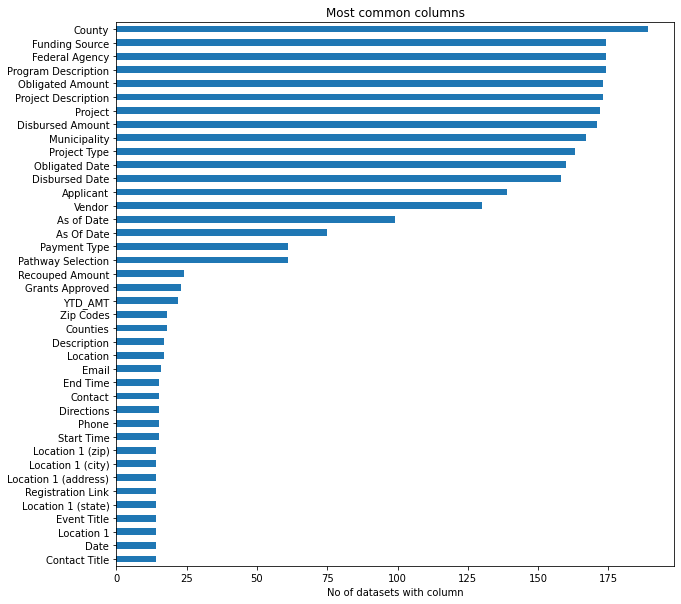

In [11]:
result.col_name.value_counts().sort_values(ascending=True).tail(40).plot(kind='barh',figsize=(10,10))
plt.xlabel('No of datasets with column')
plt.title('Most common columns')

In [12]:
dataset_counts =[]
for dataset in data:
    dataset_counts.append({'dataset': dataset['resource']['name'], 'downloads': dataset['resource']['download_count'], 'page_views': dataset['resource']['page_views']['page_views_total'] })
dataset_counts = pd.DataFrame(dataset_counts)
dataset_counts = dataset_counts.assign(downloads_pc = 100*dataset_counts.downloads.div(dataset_counts.downloads.sum()))
dataset_counts = dataset_counts.assign(page_view_pc = 100*dataset_counts.page_views.div(dataset_counts.page_views.sum()))

dataset_counts = dataset_counts.sort_values(by='downloads_pc', ascending=False).assign(cumulative_pc = lambda x: x.downloads_pc.cumsum())
dataset_counts = dataset_counts.sort_values(by='page_view_pc', ascending=False).assign(cumulative__page_views = lambda x: x.page_view_pc.cumsum())

In [13]:
attributions  = []
for d in data:
    attributions.append(d['resource']['attribution'])

In [14]:
pd.Series(attributions).value_counts()

DCA                                               63
NJ Office of Management and Budget                28
DOH                                               26
NJ Department of the Treasury                     25
DCF                                               25
                                                  ..
NJ OIT                                             1
NJ Department of Law & Public Safety               1
NJ Department of Corrections                       1
NJ Office of the Secretary of Higher Education     1
New Jersey State Police                            1
Length: 76, dtype: int64

In [15]:
dataset_counts.page_views.sum()

1240715

In [16]:
[d for d in data if d['resource']['name'] == '2010 Orthoimagery Manhattan' ]

[]

Text(0.5, 1.0, 'Top 20 datasets by % of downloads')

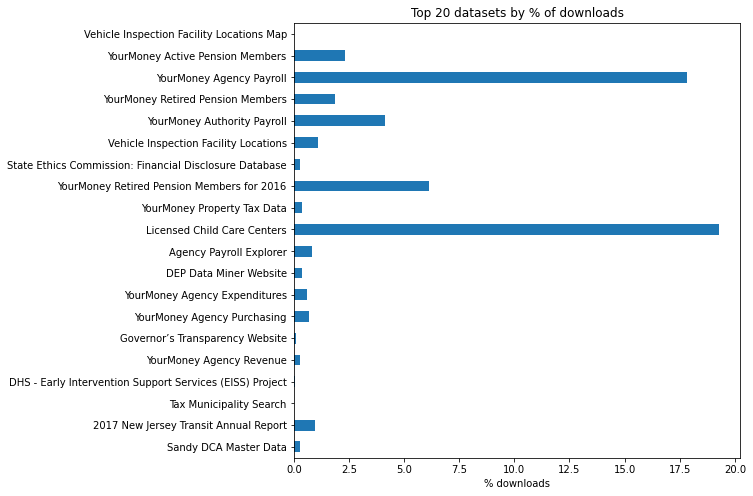

In [17]:
plt.figure(figsize=(8,8))
dataset_counts.set_index('dataset').head(20).iloc[::-1].downloads_pc.plot(kind='barh')
plt.xlabel('% downloads')
plt.ylabel(None)
plt.title('Top 20 datasets by % of downloads')

Text(0.5, 1.0, 'Top 20 datasets by % of page views')

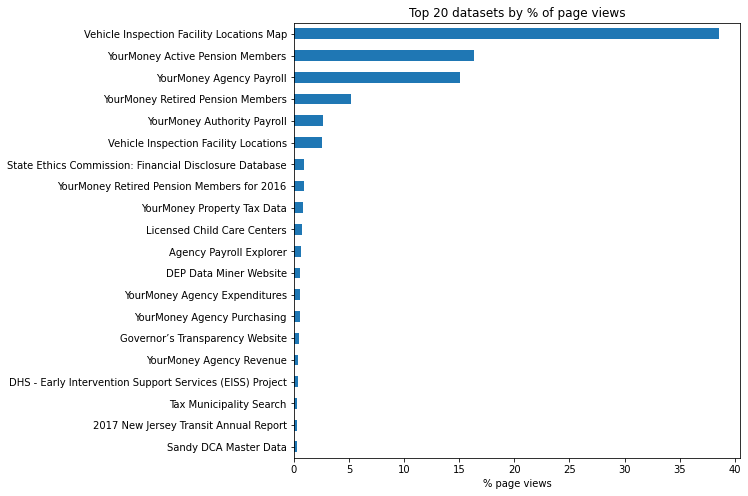

In [18]:
plt.figure(figsize=(8,8))
dataset_counts.set_index('dataset').sort_values(by='page_view_pc',ascending=False).head(20).iloc[::-1].page_view_pc.plot(kind='barh')
plt.xlabel('% page views')
plt.ylabel(None)
plt.title('Top 20 datasets by % of page views')

In [19]:
dataset_counts.sort_values(by='downloads_pc', ascending=False).head(20)

,dataset,downloads,page_views,downloads_pc,page_view_pc,cumulative_pc,cumulative__page_views
9,Licensed Child Care Centers,34972.0,8815,19.278304,0.710477,19.278304,83.806837
2,YourMoney Agency Payroll,32382.0,187266,17.850567,15.093394,37.128871,69.980777
7,YourMoney Retired Pension Members for 2016,11154.0,10940,6.148639,0.881750,43.277510,82.253862
4,YourMoney Authority Payroll,7461.0,33197,4.112874,2.675635,47.390384,77.868810
1,YourMoney Active Pension Members,4211.0,202496,2.321312,16.320912,49.711696,54.887383
3,YourMoney Retired Pension Members,3394.0,64671,1.870941,5.212398,51.582638,75.193175
21,How-to-Use the ODC: A Guide for YourMoney Users,2610.0,3097,1.438762,0.249614,53.021400,88.741411
140,2012 New Jersey Sports And Exposition Authorit...,2564.0,280,1.413404,0.022568,54.434804,96.443744
5,Vehicle Inspection Facility Locations,1972.0,31516,1.087064,2.540148,55.521868,80.408958
18,2017 New Jersey Transit Annual Report,1780.0,3503,0.981224,0.282337,56.503093,87.947353


In [20]:
dataset_counts.sort_values(by='page_view_pc', ascending=False).head(20)

,dataset,downloads,page_views,downloads_pc,page_view_pc,cumulative_pc,cumulative__page_views
0,Vehicle Inspection Facility Locations Map,6.0,478500,0.003307,38.566472,99.957003,38.566472
1,YourMoney Active Pension Members,4211.0,202496,2.321312,16.320912,49.711696,54.887383
2,YourMoney Agency Payroll,32382.0,187266,17.850567,15.093394,37.128871,69.980777
3,YourMoney Retired Pension Members,3394.0,64671,1.870941,5.212398,51.582638,75.193175
4,YourMoney Authority Payroll,7461.0,33197,4.112874,2.675635,47.390384,77.868810
5,Vehicle Inspection Facility Locations,1972.0,31516,1.087064,2.540148,55.521868,80.408958
6,State Ethics Commission: Financial Disclosure ...,539.0,11950,0.297124,0.963154,71.521890,81.372112
7,YourMoney Retired Pension Members for 2016,11154.0,10940,6.148639,0.881750,43.277510,82.253862
8,YourMoney Property Tax Data,659.0,10453,0.363274,0.842498,67.602505,83.096360
9,Licensed Child Care Centers,34972.0,8815,19.278304,0.710477,19.278304,83.806837


In [21]:
data[0]['resource']['page_views']['page_views_total']

478500

In [22]:
dataset_counts.shape

(492, 7)

In [23]:
dataset_counts

,dataset,downloads,page_views,downloads_pc,page_view_pc,cumulative_pc,cumulative__page_views
0,Vehicle Inspection Facility Locations Map,6.0,478500,0.003307,38.566472,99.957003,38.566472
1,YourMoney Active Pension Members,4211.0,202496,2.321312,16.320912,49.711696,54.887383
2,YourMoney Agency Payroll,32382.0,187266,17.850567,15.093394,37.128871,69.980777
3,YourMoney Retired Pension Members,3394.0,64671,1.870941,5.212398,51.582638,75.193175
4,YourMoney Authority Payroll,7461.0,33197,4.112874,2.675635,47.390384,77.868810
...,...,...,...,...,...,...,...
487,FY2021 Detailed Budget,1.0,3,0.000551,0.000242,99.998898,99.999436
488,EDA - EDA Energy Resilience Bank (ERB) Economi...,0.0,2,0.000000,0.000161,100.000000,99.999597
489,2020 State Tax Expenditures Report,1.0,2,0.000551,0.000161,100.000000,99.999758
490,FY2021 Budget Summary,3.0,2,0.001654,0.000161,99.989526,99.999919


In [24]:
dataset_counts.shape

(492, 7)

In [25]:
dataset_counts[dataset_counts.page_views>0].sort_values(by="page_views").head(200)

,dataset,downloads,page_views,downloads_pc,page_view_pc,cumulative_pc,cumulative__page_views
491,YourMoney 2019 Debt Report,0.0,1,0.000000,0.000081,100.000000,100.000000
488,EDA - EDA Energy Resilience Bank (ERB) Economi...,0.0,2,0.000000,0.000161,100.000000,99.999597
490,FY2021 Budget Summary,3.0,2,0.001654,0.000161,99.989526,99.999919
489,2020 State Tax Expenditures Report,1.0,2,0.000551,0.000161,100.000000,99.999758
487,FY2021 Detailed Budget,1.0,3,0.000551,0.000242,99.998898,99.999436
...,...,...,...,...,...,...,...
297,FY2013 Budget Summary,254.0,146,0.140017,0.011767,88.085841,99.062960
295,WIOA Filtered Calendar,28.0,147,0.015435,0.011848,99.362204,99.051192
293,DOH - Public Education/Information Referral Sa...,60.0,148,0.033075,0.011929,97.938877,99.039344
294,DCF Domestic Violence Staffing Expansion Project,52.0,148,0.028665,0.011929,98.336880,99.027416


In [26]:
dataset_counts

,dataset,downloads,page_views,downloads_pc,page_view_pc,cumulative_pc,cumulative__page_views
0,Vehicle Inspection Facility Locations Map,6.0,478500,0.003307,38.566472,99.957003,38.566472
1,YourMoney Active Pension Members,4211.0,202496,2.321312,16.320912,49.711696,54.887383
2,YourMoney Agency Payroll,32382.0,187266,17.850567,15.093394,37.128871,69.980777
3,YourMoney Retired Pension Members,3394.0,64671,1.870941,5.212398,51.582638,75.193175
4,YourMoney Authority Payroll,7461.0,33197,4.112874,2.675635,47.390384,77.868810
...,...,...,...,...,...,...,...
487,FY2021 Detailed Budget,1.0,3,0.000551,0.000242,99.998898,99.999436
488,EDA - EDA Energy Resilience Bank (ERB) Economi...,0.0,2,0.000000,0.000161,100.000000,99.999597
489,2020 State Tax Expenditures Report,1.0,2,0.000551,0.000161,100.000000,99.999758
490,FY2021 Budget Summary,3.0,2,0.001654,0.000161,99.989526,99.999919


In [ ]:
datasets

In [28]:
result

,datasaet_name,col_name,col_field_name,col_type,col_desc,dataset_id
0,YourMoney Active Pension Members,AS_OF_DATE,as_of_date,calendar_date,The last day of the four quarters of data repr...,44xg-bswk
1,YourMoney Active Pension Members,MEMBER_LAST_NAME,member_last_name,text,The last name of the member at the end of the ...,44xg-bswk
2,YourMoney Active Pension Members,MEMBER_FIRST_NAME,member_first_name,text,The first name of the member at the end of the...,44xg-bswk
3,YourMoney Active Pension Members,MEMBER_MI,member_mi,text,The middle initial of the member at the end of...,44xg-bswk
4,YourMoney Active Pension Members,ENROLLMENT_DATE,enrollment_date,calendar_date,The date that the member enrolled in the pensi...,44xg-bswk
...,...,...,...,...,...,...
3801,EDA - EDA Energy Resilience Bank (ERB) Economi...,Applicant,applicant_name,text,Applicant/recipient of the funds. Example: ED...,mu2b-rcht
3802,EDA - EDA Energy Resilience Bank (ERB) Economi...,Obligated Amount,obligated_amount,number,Funds committed to this project but not yet spent,mu2b-rcht
3803,EDA - EDA Energy Resilience Bank (ERB) Economi...,Obligated Date,obligated_date,calendar_date,The date that the funds were committed to this...,mu2b-rcht
3804,EDA - EDA Energy Resilience Bank (ERB) Economi...,Disbursed Amount,disbursed_amount,number,Measureable quantity for which the funds were ...,mu2b-rcht


In [29]:
joined = pd.merge(result, result, on='col_name', suffixes=["", "_right"])

In [30]:
drop_self = joined[joined['datasaet_name'] != joined['datasaet_name_right']]

In [31]:
join_counts = drop_self.groupby('datasaet_name').agg({"datasaet_name_right": "nunique"})

In [32]:
joins = (result[['datasaet_name', 'dataset_id']].drop_duplicates()
         .set_index('datasaet_name')
         .join(join_counts)
         .set_index('dataset_id')
         .fillna(0)
         .to_dict()['datasaet_name_right'])

In [35]:
with open('public/nj_potential_join_numbers.json', 'w') as f:
    json.dump(joins,f)